In [1]:
# Importando OpenCV para acessar matriz da imagem
import cv2
# Importando interface do sistema
import os
# Importando pyplot
from matplotlib import pyplot as plt
# Importando Numpy
import numpy as np

In [2]:
# Verificando o diretório atual e alterando para trabalhar com os wallpapers do computador
print(os.getcwd())
os.chdir('D:\\Wallpapers')
print(os.getcwd())

C:\Users\Avell\GitHub\PAUD
D:\Wallpapers


1920 x 1200


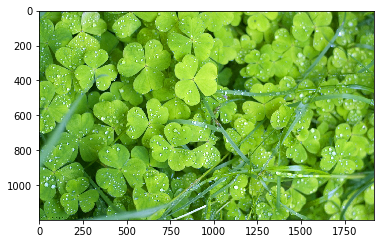

In [3]:
# Importando imagem de base
imagem = cv2.imread("base.jpg")
# Verificando dimensões
print(len(imagem[1]),'x',len(imagem))
# Exibindo a imagem em uma janela nova via OpenCV
    # cv2.imshow("Original", imagem)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
# Plotando imagem via pyplot, mas antes é necessário inverter o BGR para RGB através do numpy
plt.imshow(np.flip(imagem, 2))

In [4]:
# Informações da imagem
print("Largura (width): %d pixels" % (imagem.shape[1]))
print("Altura (height): %d pixels" % (imagem.shape[0]))
print("Canais (channels): %d"      % (imagem.shape[2]))

Largura (width): 1920 pixels
Altura (height): 1200 pixels
Canais (channels): 3


In [5]:
# Verificando valores do BGR para o primeiro pixel
print(imagem[0, 0])
print(imagem[0][0])

[ 48 155  92]
[ 48 155  92]


In [6]:
# Jogando os valores nas variáveis r g b
(b, g, r) = imagem[0, 0]
print("Cor do pixel em (0, 0) - Vermelho: %d, Verde: %d, Azul: %d" % (r, g, b))

Cor do pixel em (0, 0) - Vermelho: 92, Verde: 155, Azul: 48


In [7]:
# Visualizando as informações da imagem limitando a uma dimensão 3x3
imagem[0:3, 0:3]

array([[[ 48, 155,  92],
        [ 50, 156,  90],
        [ 50, 156,  90]],

       [[ 51, 159,  93],
        [ 53, 159,  93],
        [ 53, 157,  92]],

       [[ 57, 163,  97],
        [ 55, 161,  95],
        [ 53, 157,  92]]], dtype=uint8)

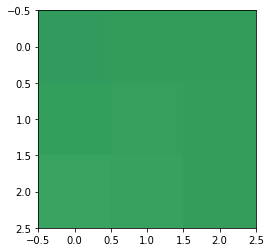

In [8]:
# Plotando a dimensão 3x3
plt.imshow(imagem[0:3, 0:3])

In [9]:
# Realizando a média da vertical e depois da horizontal
media = np.average(np.average(imagem, axis=1), axis=0)
print('Média:',media)
# Colocando valores em um array 3d e arredondando para inteiros
array = np.int_([[media.tolist()]])
print('Arredondado:', array)

Média: [ 56.45864106 172.4796224  114.21835069]
Arredondado: [[[ 56 172 114]]]


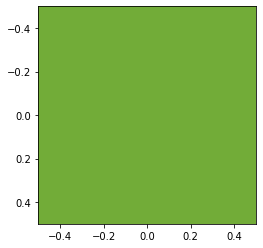

In [10]:
# Tom da imagem
plt.imshow(np.flip(array))

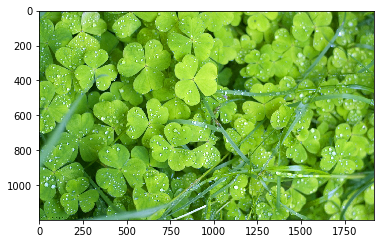

In [11]:
# Imagem original
plt.imshow(np.flip(imagem, 2))